In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


combined_wine = pd.read_csv('combined_wine.csv')
combined_wine.head()
combined_wine.shape


(6497, 13)

In [357]:
combined_wine_copy = combined_wine.copy()

In [358]:
#create a new column called 'quality_label' and assign the value based on the 'quality' column  value
# 0-4 = 'low'   5-6 = 'medium'   7-10 = 'high'  
combined_wine_copy['quality_label'] = combined_wine_copy['quality'].apply(lambda value: 'low' if value <= 4 else 'medium' if value <= 6 else 'high')

combined_wine_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium


In [359]:
# numeric_features = combined_wine_copy.select_dtypes(include=[np.number]) #selecting only numerical features

# mask = np.triu(numeric_features.corr())
# plt.figure(figsize=(10, 8))
# sns.heatmap(numeric_features.corr(), annot=True, fmt='.1f', cmap='coolwarm', mask=mask)
# plt.show()


In [360]:
# # Calculate IQR for each numeric feature
# numeric_cols = combined_wine_copy.select_dtypes(include=[np.number]).columns
# Q1 = combined_wine_copy[numeric_cols].quantile(0.25)
# Q3 = combined_wine_copy[numeric_cols].quantile(0.75)
# IQR = Q3 - Q1
# outliers = combined_wine_copy[((combined_wine_copy[numeric_cols] < (Q1 - 1.5 * IQR)) | (combined_wine_copy[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
# print(outliers.shape)

# # Remove outliers
# combined_wine_copy = combined_wine_copy[~combined_wine_copy.isin(outliers)].dropna()
# print(combined_wine_copy.shape)

In [361]:
numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns
corr_matrix  = combined_wine_copy[numeric_columns].corr() #correlation values
corr_pairs = corr_matrix.unstack().sort_values(ascending=False) #correlation pairs
unique_corr_pairs = corr_pairs.drop_duplicates() #drop duplicates
unique_corr_pairs[1:10] #top 10 correlation pairs



total sulfur dioxide  free sulfur dioxide    0.720934
residual sugar        density                0.552517
total sulfur dioxide  residual sugar         0.495482
fixed acidity         density                0.458910
quality               alcohol                0.444319
free sulfur dioxide   residual sugar         0.402871
sulphates             chlorides              0.395593
chlorides             volatile acidity       0.377124
                      density                0.362615
dtype: float64

In [362]:
# # Select the numeric columns

# numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns

# # Calculate the correlation matrix
# corr_matrix = combined_wine_copy[numeric_columns].corr()

# # Create a mask for negative correlations
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True  # This masks the upper triangle
# mask[corr_matrix <= 0] = True  # This masks negative correlations

# # Create the plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, 
#             mask=mask,
#             annot=True,  # Show correlation values
#             cmap='YlOrRd',  # Use a colormap that works well for positive values
#             vmin=0, vmax=1,  # Set the range from 0 to 1
#             square=True,
#             fmt='.2f')  # Round correlation values to 2 decimal places

# plt.title('Positive Correlations in Wine Dataset')
# plt.tight_layout()
# plt.show()

In [363]:
# # Select the numeric columns
# numeric_columns = combined_wine_copy.select_dtypes(include=[np.number]).columns
# # Calculate the correlation matrix
# corr_matrix = combined_wine_copy[numeric_columns].corr()

# # Create a mask for positive correlations
# mask = np.zeros_like(corr_matrix)
# mask[np.triu_indices_from(mask)] = True  # This masks the upper triangle
# mask[corr_matrix >= 0] = True  # This masks positive correlations

# # Create the plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, 
#             mask=mask,
#             annot=True,  # Show correlation values
#             cmap='RdBu_r',  # Use a diverging colormap that works well for negative values
#             vmin=-1, vmax=0,  # Set the range from -1 to 0
#             square=True,
#             fmt='.2f')  # Round correlation values to 2 decimal places

# plt.title('Negative Correlations in Wine Dataset')
# plt.tight_layout()
# plt.show()

In [364]:
# # Remove columns for fixed acidity and volatile acidity
# combined_wine_copy = combined_wine_copy.drop(columns=['fixed acidity', 'volatile acidity'])

In [365]:
combined_wine_copy.head()
combined_wine_copy.shape

(6497, 14)

Encoding

In [366]:
# Identifying categorical columns except 'type' since it will be our target
cat_cols = combined_wine_copy.select_dtypes(include='object').columns
cat_cols = [col for col in cat_cols if col != 'type']  # Exclude 'type' from encoding

# Create dummy variables for categorical columns (except type)
encoded_cols = pd.get_dummies(combined_wine_copy[cat_cols], dtype=int)

# Concatenate the encoded columns with the original dataframe
combined_wine_encoded = pd.concat([combined_wine_copy, encoded_cols], axis=1)

# Drop the original categorical columns (except type)
combined_wine_encoded = combined_wine_encoded.drop(cat_cols, axis=1)
combined_wine_encoded.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_label_high,quality_label_low,quality_label_medium
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0,1


split data

In [367]:
#importing train_test_split and GridSearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

X = combined_wine_encoded.drop('type', axis=1) #features
y = combined_wine_encoded['type'] #target

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [368]:
y_test.shape

(1300,)

Building model - RandomForestClassifier

0.9953846153846154


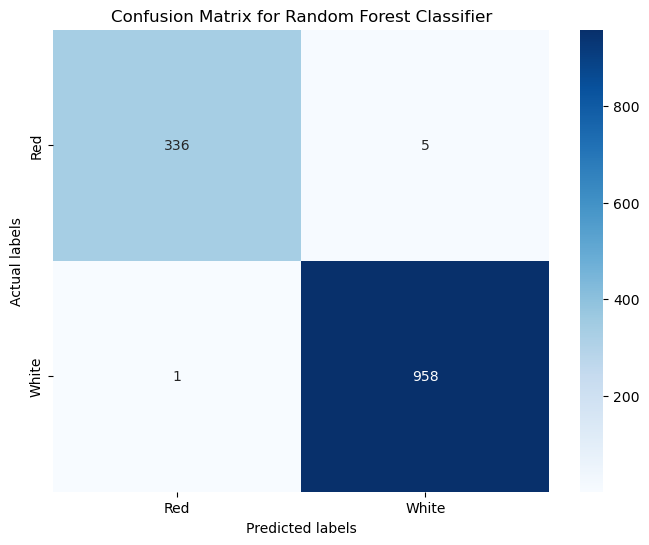

In [369]:
#importing random forest classifier
from sklearn.ensemble import RandomForestClassifier as randomforestclassifier

#initializing the model
RF_model = randomforestclassifier(random_state=42)

#fitting the model
RF_model.fit(X_train, y_train)

preds = RF_model.predict(X_test) #predicting
X_test
y_test

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy


#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [370]:
# To get classification report with precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         red       1.00      0.99      0.99       341
       white       0.99      1.00      1.00       959

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



Building model - Decision Tree

0.9792307692307692


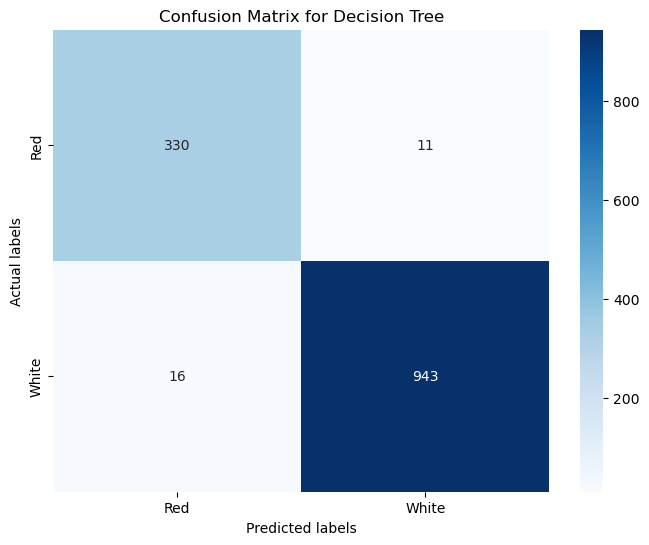

In [371]:
#importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#initializing the model
DT_model = DecisionTreeClassifier(random_state=42)

#fitting the model
DT_model.fit(X_train, y_train)

# Prediction
preds = DT_model.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show() 


Building model - Linear Regression

0.9746153846153847


/opt/anaconda3/envs/CAB_V1/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


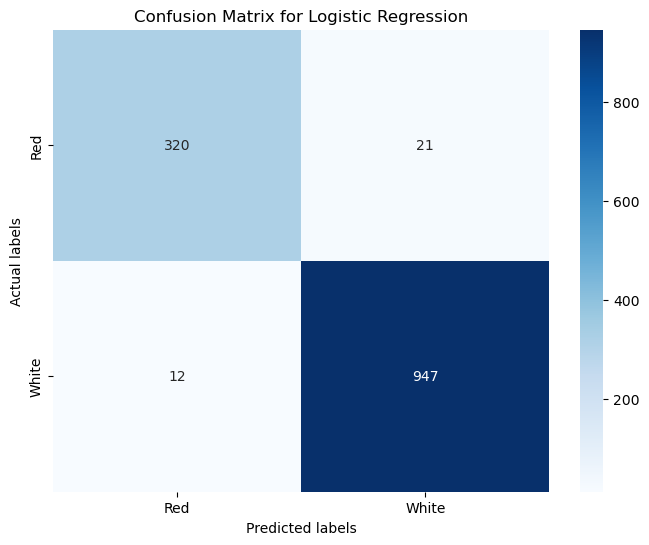

In [372]:
#importing linear regression    
from sklearn.linear_model import LogisticRegression

#initializing the model
LR_model = LogisticRegression(random_state=42)

#fitting the model
LR_model.fit(X_train, y_train)

# Prediction
preds = LR_model.predict(X_test) #predicting
X_test
y_test

# accuracy score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #importing necessary metrics
acc = accuracy_score(y_test, preds) #accuracy
print(acc) #accuracy

#create a confusion matrix

conf_matrix = confusion_matrix(y_test, preds)

#create a visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red', 'White'], yticklabels=['Red', 'White'])
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show() 
